In [150]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

### DataFrame selection

'Titanic'

In [151]:
df = fetch_openml('titanic', version=1, as_frame=True)['data']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


# Null info
---
Getting information about NULL values, and making a graph to understand about them

In [152]:
# null percentage is calculated
df_null = pd.DataFrame((df.isnull().sum()/len(df))*100)
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [153]:
import seaborn as sns # importing graph plotting library

* Plotting Graph

<Axes: title={'center': 'Null %'}, ylabel='%'>

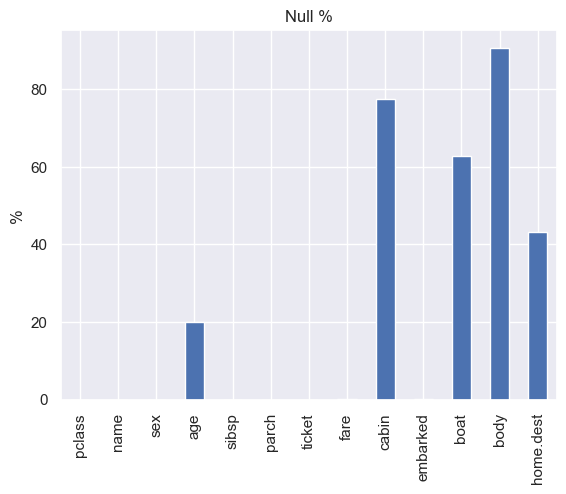

In [154]:
sns.set()
df_null.plot(kind='bar', title='Null %', ylabel='%', legend=False)

In [155]:
df.shape

(1309, 13)

# Removing unnecessary
---
Dropping the body column since over 85% of its values are null and it adds minimal informational value.

In [156]:
df.drop(columns=['body'],axis=1, inplace=True)
print(df.shape)
df.head(5)

(1309, 12)


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


# Imputing
---
Imputing is a method used in cleaning of a dataset by filling the Null values with specific statistically thought methods like, 'mean', 'most_frequent', 'median' etc..

In [157]:
from sklearn.impute import SimpleImputer

In [158]:
# Creating a function which runs throughout the dataFrame and marks strategy for specific (null containing) columns
def get_para1(df):
    parameters = {}
    for col in df.columns[df.isnull().any()]:
        if df[col].dtype == float or df[col].dtype == int:
            strategy = 'mean'
        else:
            strategy = 'most_frequent'
        missing_values = df[col][df[col].isnull()].values[0]
        parameters[col] = {'missing_values': missing_values, 'strategy': strategy}
    return parameters
get_para1(df)

{'age': {'missing_values': np.float64(nan), 'strategy': 'mean'},
 'fare': {'missing_values': np.float64(nan), 'strategy': 'mean'},
 'cabin': {'missing_values': nan, 'strategy': 'most_frequent'},
 'embarked': {'missing_values': nan, 'strategy': 'most_frequent'},
 'boat': {'missing_values': nan, 'strategy': 'most_frequent'},
 'home.dest': {'missing_values': nan, 'strategy': 'most_frequent'}}

* **Applying imputation** according to predefined missing_values with predefined strategies

In [159]:
parameters = get_para1(df)
for col,param in parameters.items():
    missing_values = param['missing_values']
    strategy = param['strategy']
    impute = SimpleImputer(missing_values=missing_values,strategy=strategy)
    df[col] = impute.fit_transform(df[[col]]).ravel() # df[[col]] represents 2D and .ravel is imp coz 2D is converted into sequence

In [160]:
df.isnull().sum()

pclass       0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
home.dest    0
dtype: int64

In [161]:
df.head(5)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"


# Feature Engineering
---
It is the name of creating a feature on the basis of data for ease of work <br>
(process of creating, transforming, or selecting input variables (features) so that a machine-learning model can understand the data better and perform well.)

<Axes: title={'center': 'Travelled Alone?'}, xlabel='travelled_alone'>

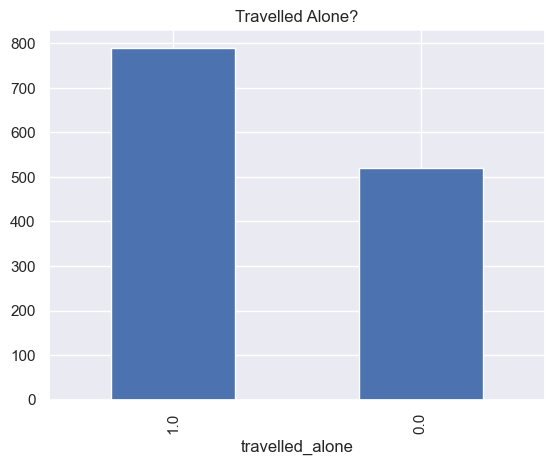

In [162]:
# creating a column which tells us if the traveller was travelling alone or not
df.loc[df['sibsp']+df['parch'] >0, 'travelled_alone'] = 0
df.loc[df['sibsp']+df['parch'] ==0, 'travelled_alone'] = 1
df['travelled_alone'].value_counts().plot(title='Travelled Alone?', kind='bar')

# Data Encoding
---
**Data encoding** is the process of converting categorical (text or labels) data into numerical form so that a machine learning model can understand and use it.<br>
* using **OneHotEncoder**<br>
This auto encoding uses sorting values **lexicographically** and encode them in tabular format.... here {<b> 'female': [1,0], 'male': [0,1] </b>}<br>
So, after assigning df['sex'] uses first column of encoded table i.e. f:1,m:0; but we uses **[:,1]** using it's second column which says m:1,f:0 .

In [163]:
from sklearn.preprocessing import OneHotEncoder
df['sex'] = OneHotEncoder(sparse_output=False).fit_transform(df[['sex']])[:,1]

In [164]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,travelled_alone
0,1,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO",1.0
1,1,"Allison, Master. Hudson Trevor",1.0,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",0.0
2,1,"Allison, Miss. Helen Loraine",0.0,2.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",0.0


# Data Scaling
---
Data scaling is the process of resizing or transforming numerical features so that they all share a common scale, without distorting differences in their ranges.<br>
This helps prediction algorithms to work better<br>
There are two types of DataScaling methods :
1) **StandardScaling** : Scaling using Standard Deviation
2) **MinMaxScaling** : Scaling using Min values / Range

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
num_col = df.select_dtypes(include= [int,float]).columns

* Applying **StandardScaling**, the values transform into log

In [166]:
df[num_col] = StandardScaler().fit_transform(df[num_col])
df[num_col].describe()

,pclass,sex,age,sibsp,parch,fare,travelled_alone
count,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03
mean,-1.737003e-16,9.770641e-17,1.519878e-16,-8.142201e-18,1.628440e-17,4.342507e-17,6.513761e-17
std,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00
min,-1.546098e+00,-1.344995e+00,-2.307330e+00,-4.790868e-01,-4.449995e-01,-6.437751e-01,-1.233758e+00
25%,-3.520907e-01,-1.344995e+00,-6.119712e-01,-4.790868e-01,-4.449995e-01,-4.911082e-01,-1.233758e+00
50%,8.419164e-01,7.434969e-01,2.758687e-16,-4.790868e-01,-4.449995e-01,-3.643001e-01,8.105319e-01
75%,8.419164e-01,7.434969e-01,3.974806e-01,4.812878e-01,-4.449995e-01,-3.906640e-02,8.105319e-01
max,8.419164e-01,7.434969e-01,3.891737e+00,7.203909e+00,9.956864e+00,9.262219e+00,8.105319e-01


* Applying **MinMaxScaling**

In [167]:
df[num_col] = MinMaxScaler().fit_transform(df[num_col])
df[num_col].describe()

,pclass,sex,age,sibsp,parch,fare,travelled_alone
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.647441,0.644003,0.372206,0.062357,0.042781,0.064988,0.603514
std,0.418918,0.478997,0.161376,0.130207,0.096173,0.100988,0.489354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.273486,0.000000,0.000000,0.015412,0.000000
50%,1.000000,1.000000,0.372206,0.000000,0.000000,0.028213,1.000000
75%,1.000000,1.000000,0.436325,0.125000,0.000000,0.061045,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
